In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pysr import PySRRegressor
import custom_rcparams

In [2]:
def error(data,model):
    if len(data) != len(model):
        print('ERROR: array must have the same length!')
        return
    
    l = len(data)
    error = []
    
    for i in range(l):
        error.append(100*abs((data[i] - model[i]) / data[i]))
    
    return np.array(error)

In [3]:
def rmse(actual_values,predicted_values):
    squared_diff = [(actual - predicted) ** 2 for actual, predicted in zip(actual_values, predicted_values)]

    # Step 4: Calculate the mean of squared differences
    mean_squared_diff = np.mean(squared_diff)

    # Step 5: Calculate RMSE (square root of the mean squared difference)
    rmse = np.sqrt(mean_squared_diff)
    return rmse

In [4]:
def accuracy(data, model):
    if len(data) != len(model):
        print('ERROR: array must have the same length!')
        return
    
    l = len(data)
    total_error = 0
    
    for i in range(l):
        error = abs((data[i] - model[i]) / data[i])
        total_error += error
    
    avg_error = total_error / l
    accuracy_percentage = 100 * (avg_error)
    
    return accuracy_percentage

In [5]:
df = pd.read_csv('CL_20_2.csv')
model = PySRRegressor()


         hall_of_fame_2023-10-07_003226.163.pkl
$$ H(\ell, \tau) = \cosh{\left(54.3^{- \sin{\left(2.77 \tau - \log{\left(\ell + 1.40 \right)} \right)}} \tau \right)}$$

In [6]:
def G(ell, tau, ell_0, beta, model, x):
    h = model.predict(x)
    c = 1
    s = 1/(1+np.exp(-beta*(ell-ell_0)))
    return (1-s)*h+s*c


In [7]:
t_reio = np.round(np.linspace(0.0561-5*0.0071, 0.0561+5*0.0071, 20, endpoint=True),4)
tau = 0.0561
index = np.abs(t_reio - tau).argmin()
t_reio[index] = tau

ee = df['EE'].values
tau = df['tau'].values
ell = df['ell'].values
x = pd.DataFrame({'ell': df['ell'], 'tau': df['tau']})

a = len(t_reio)
b = len(ell)
alpha = int(b/a)
ee_alpha = ee[0:alpha]
beta = model.from_file('hall_of_fame_2023-10-07_003226.163.pkl')
avg_acc = 0
avg_rmse = 0

ee_vec = []
ga_vec = []
ell1 = ell[0:alpha]
ee_alpha = ee[0:alpha]

for i in range(a):
    z = G(ell[i * alpha:(i + 1) * alpha], tau[i * alpha:(i + 1) * alpha], 120, 1, beta, x[i * alpha:(i + 1) * alpha])
    y = beta.predict(x)[i * alpha:(i + 1) * alpha]
    ee_vec.append(y)
    ga_vec.append(z)

Checking if hall_of_fame_2023-10-07_003226.163.pkl exists...
Loading model from hall_of_fame_2023-10-07_003226.163.pkl


In [8]:


#plt.xlim([20,50])
#plt.ylim([0.7,1.2])
for i in range(1):
    i = j+19
    l = ell[i * alpha:(i + 1) * alpha]
    factor = l*(l+1)*10**12
    y = np.exp(-2*tau[0]) * (ee[i * alpha:(i + 1) * alpha]) / (ee_alpha*np.exp(-2*tau[i * alpha:(i + 1) * alpha]))
    z = beta.predict(x)[i * alpha:(i + 1) * alpha]
    q = G(ell[i * alpha:(i + 1) * alpha], tau[i * alpha:(i + 1) * alpha], 120, 1)
    w = G(ell[i * alpha:(i + 1) * alpha], tau[i * alpha:(i + 1) * alpha], 120, 1)*ee_alpha* np.exp(-2*tau[i * alpha:(i + 1) * alpha])/np.exp(-2*tau[0])

    string = r'$\tau_{reio}=$' + str(round(t_reio[i], 2))
    plt.loglog(l, factor*ee[i * alpha:(i + 1) * alpha],alpha=0.7,color = 'r', label='CLASS data')
    plt.plot(l, (factor*w), color='k', label='PySR')
    plt.legend()  

    acc = accuracy(ee[i * alpha:(i + 1) * alpha],w)
    avg_acc += acc/20
    avg_rmse += rmse(ee[i * alpha:(i + 1) * alpha],w)/20
    print('tau_',i+1,' MAPE:',round(acc,2))

print('average MAPE is:', round(avg_acc,2), '%')
print('RMSE of the model is: ',round(avg_rmse,2))

plt.xlabel('$\ell$')
plt.ylabel('$C^{EE}_{\ell}\cdot \ell(\ell+1)/2\pi \ \ [\mu K^2]$')
plt.show() 

NameError: name 'j' is not defined

1) f(t,l) è la tua funzione. La tua funzione va bene MA per l>lma scazza
2) Sia g(l) l'andamento asintotico che ci aspettiamo in questo caso, g(l) = 1 per l>30.
3) Sia s(l) la logistica che va da 0 a 1.
3) Una possibile soluzione è usare
$$h(t,l)= (1-s(l))*f(t,l)+s(l)*g(l)$$
dove la logistica è definita come
$$ s(\ell) = \frac{\alpha}{1+e^{-\beta(\ell-\bar{\ell})}} $$
con $\alpha = 1$, $\bar{\ell}$ è il primo valore di $\ell$ in cui si annulla la derivata dopo il picco descritto $\mathcal{H}(\ell,\tau)$ nella regione $\ell \in [2,50]$ e $\beta$ è un parametro da determinare.

In [9]:
x2 = pd.DataFrame({'ell': np.linspace(2,20000,200000),'tau': np.full(200000, 0.0916)})

In [10]:
import rcpresentation

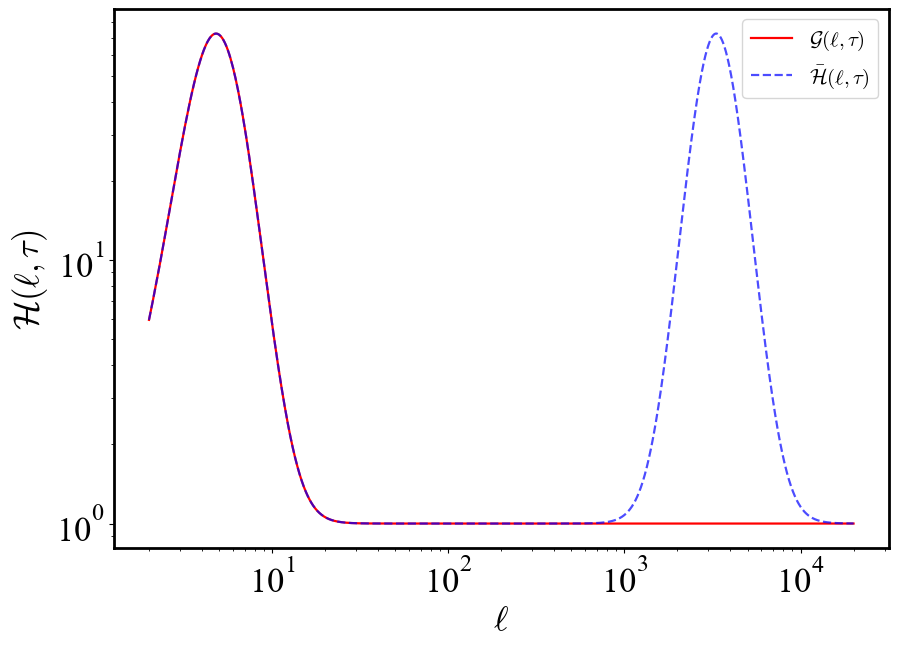

In [12]:
ind = len(ee_vec)
plt.loglog(x2['ell'],G(x2['ell'],x2['tau'],130,1,beta,x2), label=r'$\mathcal{G}(\ell, \tau)$', color = 'r')
plt.loglog(x2['ell'],beta.predict(x2),linestyle='--',alpha=0.7, label=r'$\mathcal{\bar{H}}(\ell, \tau)$', color='blue')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$\mathcal{H}(\ell,\tau)$')
plt.legend()
plt.savefig('CL_GA_VS_plot.pdf') 